In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.columns, train_data.shape

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 (891, 12))

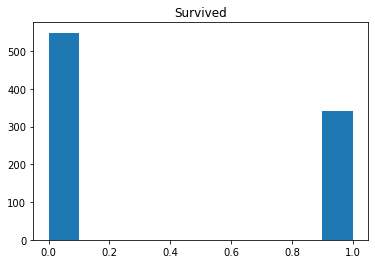

(0    549
 1    342
 Name: Survived, dtype: int64,
 0    0.616162
 1    0.383838
 Name: Survived, dtype: float64)

In [6]:
train_data['Survived'].hist()
plt.title('Survived')
plt.grid()
plt.show()

train_data['Survived'].value_counts(), train_data['Survived'].value_counts(normalize = True)

In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_data.columns, test_data.shape

(Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 (418, 11))

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


## Metadados

### Dados categóricos
#### Embarked: Em que porto a observação embarcou (Cherbourg, Queenstown ou Southampton - C, Q ou S)
#### Pclass: Classe do bilhete da observação (Atributo categórico que pode ser considerado ordinal)
#### Sex: Gênero da observação

### Dados numéricos
#### Age: Idade da observação
#### Parch: Quantidade de pais (Parents) e/ou filhos (Children) da observação a bordo
#### Sibsp: Quantidade de irmãos (Siblings) e/ou cônjuges (Spouses) da observação a bordo
#### Fare: Tarifa paga por cada observação

### Atributos dispensados
#### Cabin: Número da cabine
#### PassengerId: índice do(a) passageiro(a) (da observação)
#### Name: Nome completo da observação
#### Ticket: Número do bilhete

### Atributo meta/alvo
#### Survived: Se a observação sobreviveu ao naufrágio

In [10]:
test_data_ids = test_data['PassengerId']
test_data_sex = test_data['Sex']

In [11]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin']

train_data_filtered = train_data.drop(columns = columns_to_drop)
test_data.drop(columns = columns_to_drop, inplace = True)

In [12]:
train_data_filtered.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
categorical_features = ['Embarked','Pclass','Sex']
numerical_features = ['Age','Fare','Parch','SibSp']
target_variable = train_data_filtered['Survived']

train_data_categorical = train_data_filtered[categorical_features]
train_data_numerical = train_data_filtered[numerical_features]

In [14]:
train_data_categorical.head()

,Embarked,Pclass,Sex
0,S,3,male
1,C,1,female
2,S,3,female
3,S,1,female
4,S,3,male


In [15]:
train_data_numerical.head()

,Age,Fare,Parch,SibSp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0


In [16]:
def data_exploration(data, numerical_features, categorical_features):
    for feature in categorical_features:
        display(pd.crosstab(data[feature],data['Survived']))
        
    for feature in categorical_features:
        print(data[feature].hist())
        plt.title(feature)
        plt.show()
    

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Sex,,
female,81,233
male,468,109


AxesSubplot(0.125,0.125;0.775x0.755)


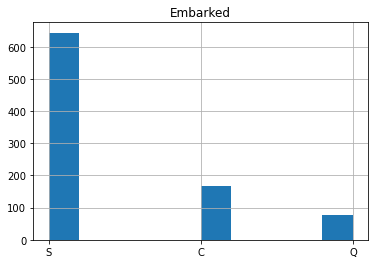

AxesSubplot(0.125,0.125;0.775x0.755)


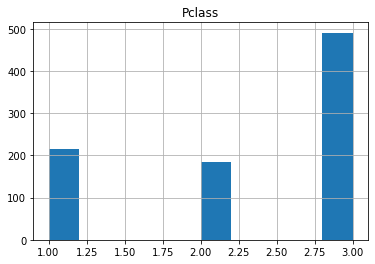

AxesSubplot(0.125,0.125;0.775x0.755)


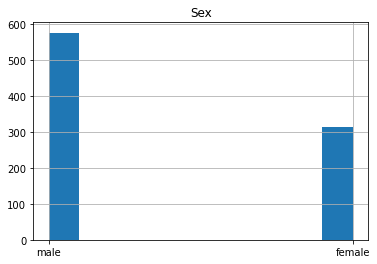

In [17]:
data_exploration(train_data_filtered, numerical_features, categorical_features)

### Análise exploratória de dados - Dados de treinamento

In [18]:
train_data_survived = train_data_filtered[train_data_filtered['Survived'] == 1]
train_data_deceased = train_data_filtered[train_data_filtered['Survived'] == 0]

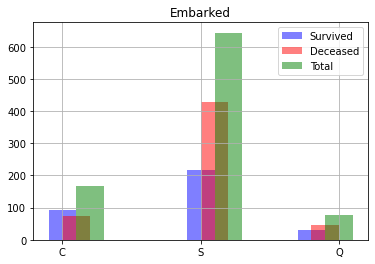

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


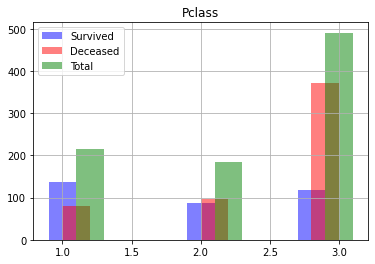

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


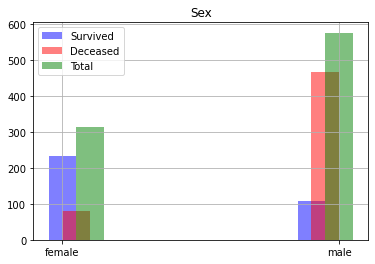

Survived    0    1
Sex               
female     81  233
male      468  109


In [19]:
plt.style.use('seaborn-deep')

for feature in categorical_features:    
    
    train_data_survived[feature].hist(color = 'blue', alpha=0.5, align = 'left')
    train_data_deceased[feature].hist(color = 'red', alpha=0.5, align = 'mid')
    train_data_filtered[feature].hist(color = 'green', alpha = 0.5, align = 'right')
    
    plt.title(feature)
    plt.legend(['Survived','Deceased','Total'])
    plt.show()
    
    print(pd.crosstab(train_data_filtered[feature],train_data_filtered['Survived']))

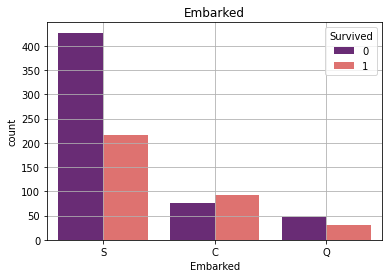

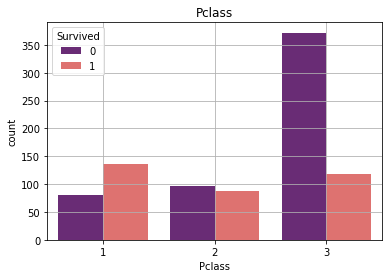

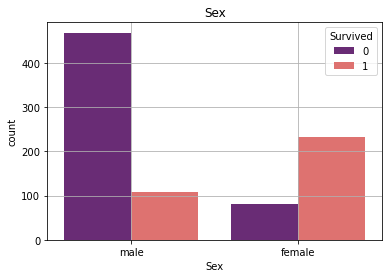

In [20]:
for feature in categorical_features:    
    #print(feature)
    sns.countplot(data=train_data_filtered, x=feature, hue='Survived', palette = 'magma')
    plt.title(feature)
    plt.grid()
    plt.show()

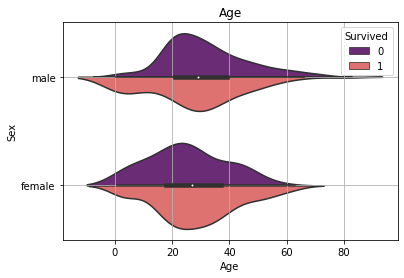

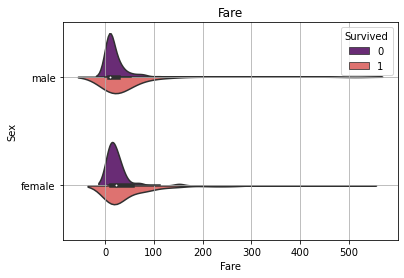

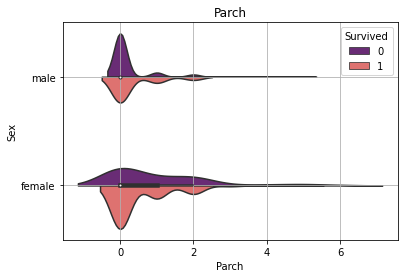

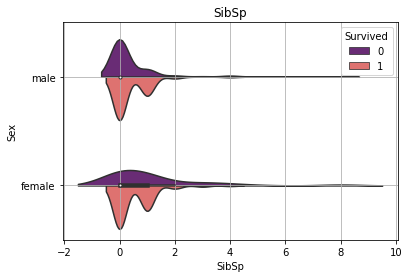

In [52]:
for feature in numerical_features:
    sns.violinplot(data=train_data_filtered, y = 'Sex', x = feature, hue = 'Survived', split=True, palette = 'magma')
    plt.title(feature)
    plt.grid()
    plt.show()

In [22]:
train_data_numerical.describe()

,Age,Fare,Parch,SibSp
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,0.523008
std,14.526497,49.693429,0.806057,1.102743
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,0.000000,1.000000
max,80.000000,512.329200,6.000000,8.000000


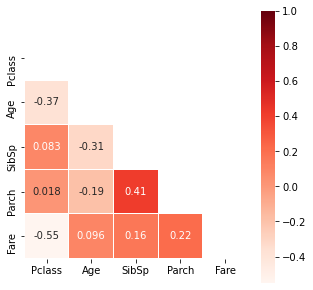

In [43]:
X_data = train_data_filtered.drop(columns = 'Survived')
corr = X_data.corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = 'Reds' #'inferno' #'jet'
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(corr, vmax = 1, cmap=cmap, square=True, linewidths=.2, annot = True, mask=mask)

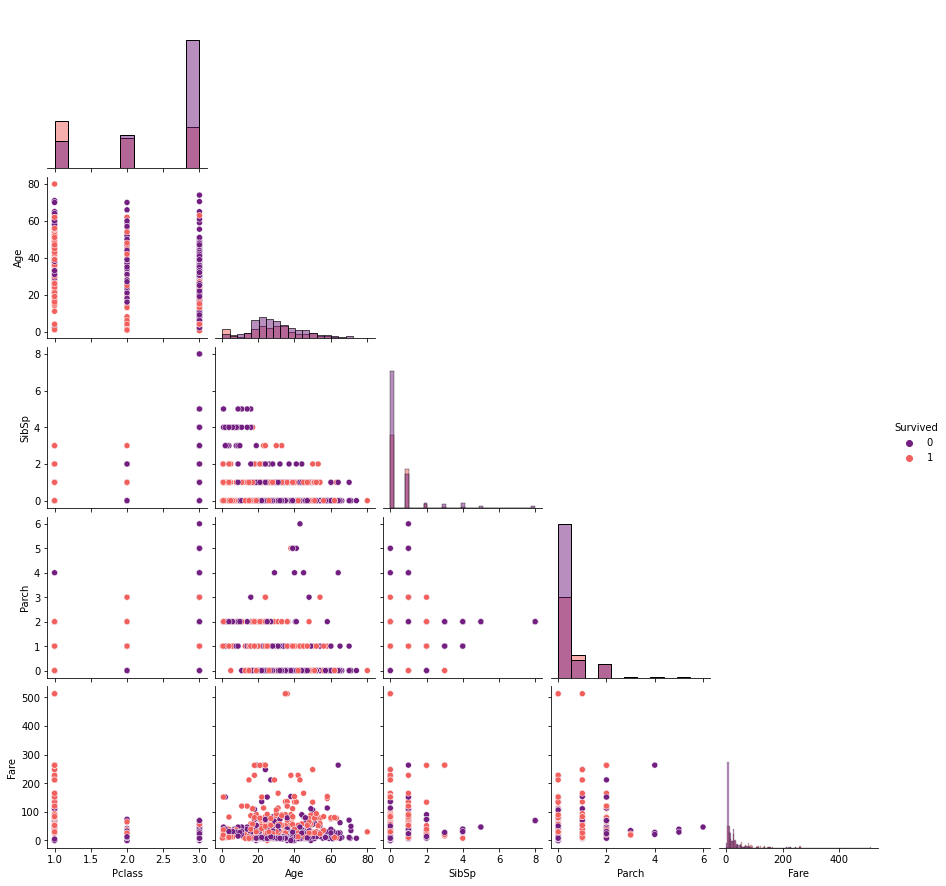

In [42]:
sns.pairplot(data = train_data_filtered, hue = 'Survived', palette = 'magma', corner = True, diag_kind="hist");

### Execução dos Modelos

In [25]:
X_data = pd.get_dummies(X_data, columns = ['Embarked', 'Pclass'], prefix = ['Embarked_', 'P_class'])

X_data['is_male'] = np.where(X_data['Sex'] == 'male', 1, 0)
X_data.drop(columns = 'Sex', inplace = True)

In [26]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#impute missing values with the mean of the 3 nearest neighbours
imputer = KNNImputer(n_neighbors=3, weights = 'distance')

imputer.fit(X_data)
X_imputed = imputer.transform(X_data)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_imputed)
x_scaled = scaler.transform(X_imputed)

X_data = pd.DataFrame(x_scaled, columns = X_data.columns)

X_data

,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,P_class_1,P_class_2,P_class_3,is_male
0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,0.302117,0.125,0.333333,0.045771,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
test_data = pd.get_dummies(test_data, columns = ['Embarked', 'Pclass'], prefix = ['Embarked_', 'P_class'])

test_data['is_male'] = np.where(test_data['Sex'] == 'male', 1, 0)
test_data.drop(columns = 'Sex', inplace = True)

test_imputed = imputer.transform(test_data)
test_scaled = scaler.transform(test_imputed)

test_data = pd.DataFrame(test_scaled, columns = test_data.columns)

test_data

,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,P_class_1,P_class_2,P_class_3,is_male
0,0.428248,0.000,0.000000,0.015282,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.334004,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,0.313060,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,1.0
414,0.484795,0.000,0.000000,0.212559,1.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.478512,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,1.0
416,0.313060,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)
model = clf.fit(X_data, target_variable)
y_predicted = model.predict(test_data)

In [29]:
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
results = {'PassengerId':test_data_ids, 'Survived':y_predicted}
results = pd.DataFrame(results)
display(results.head())
display(results['Survived'].value_counts())

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


0    260
1    158
Name: Survived, dtype: int64

In [45]:
results.to_csv('submission.csv', index = False, header = True)